In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('Train_Data.csv')

In [4]:
train_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [5]:
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

In [6]:
train_df.shape

(1966, 9)

In [7]:
train_df.isna().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [8]:
train_df.columns

Index(['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT',
       'LBXIN', 'age_group'],
      dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   float64
dtypes: float64(9)
memory usage: 138.4 KB


In [10]:
train_df.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000,1952.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892,0.160861
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713,0.367497
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000,0.000000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000,0.000000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000,0.000000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000,0.000000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000,1.000000


<Axes: >

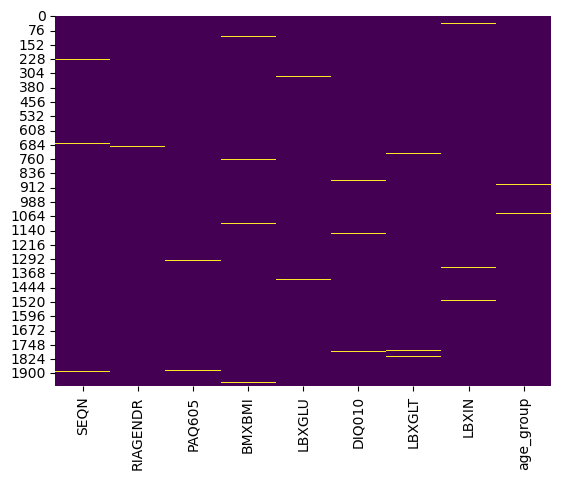

In [11]:
sns.heatmap(train_df.isna(), cbar=False, cmap='viridis')

<Axes: xlabel='age_group', ylabel='count'>

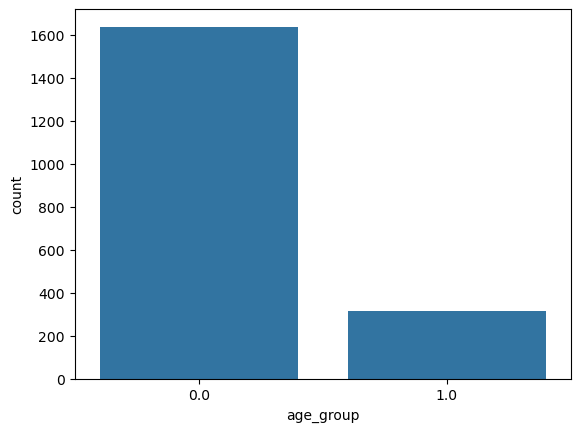

In [12]:
sns.countplot(x='age_group', data=train_df)

In [13]:
numeric_cols = train_df.select_dtypes(include='float64').columns.drop(['SEQN'])

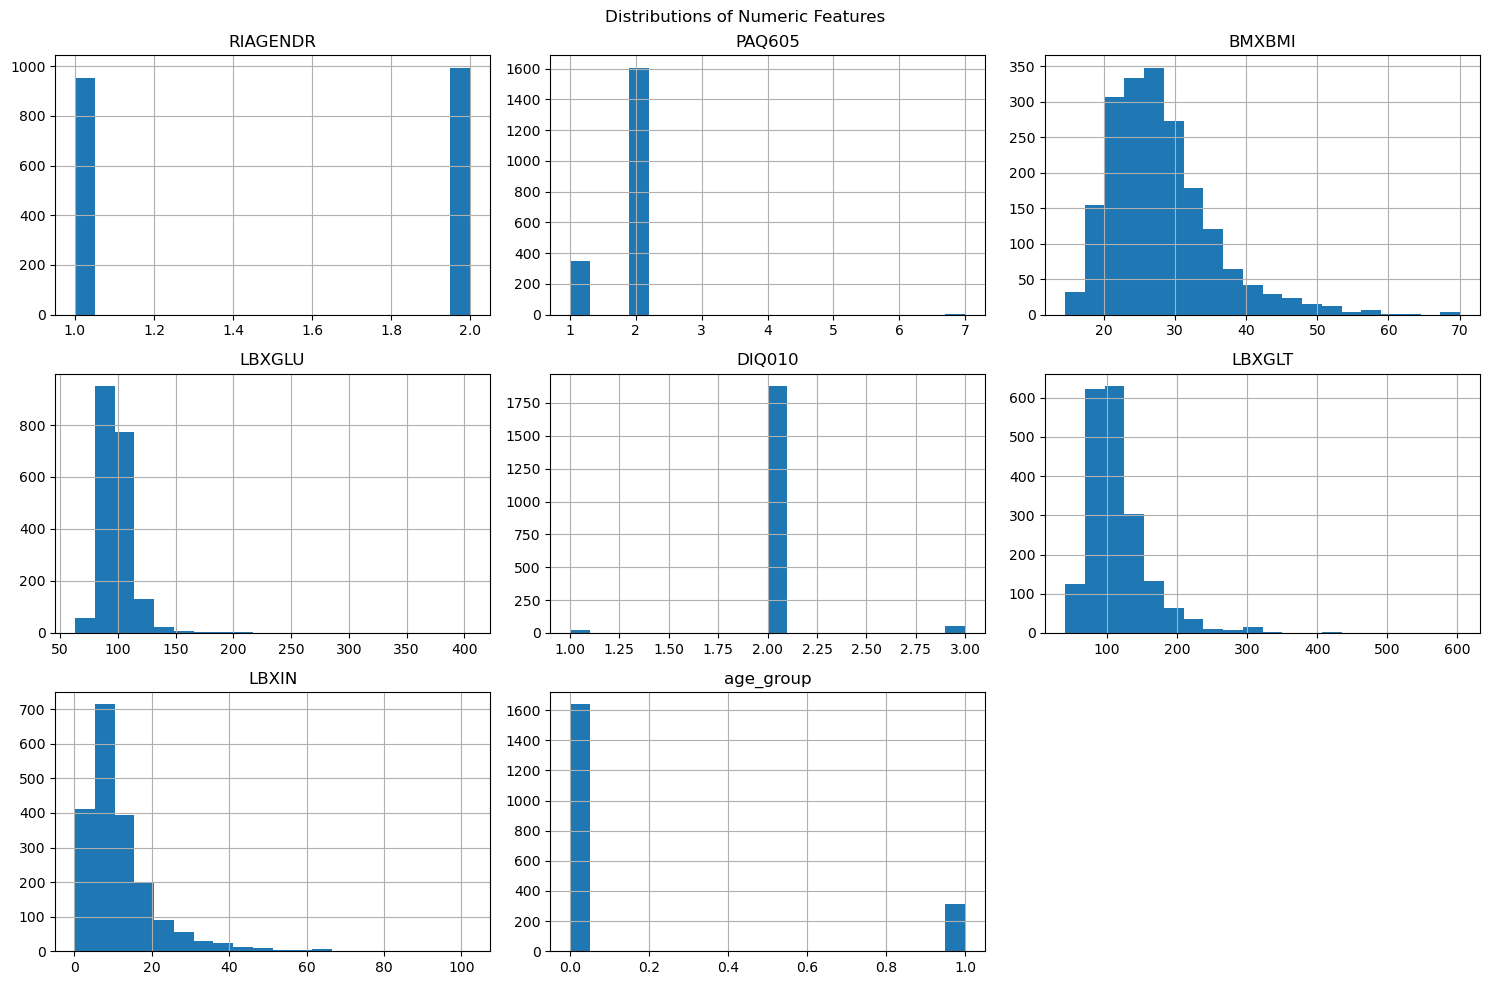

In [14]:
train_df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distributions of Numeric Features')
plt.tight_layout()
plt.show()

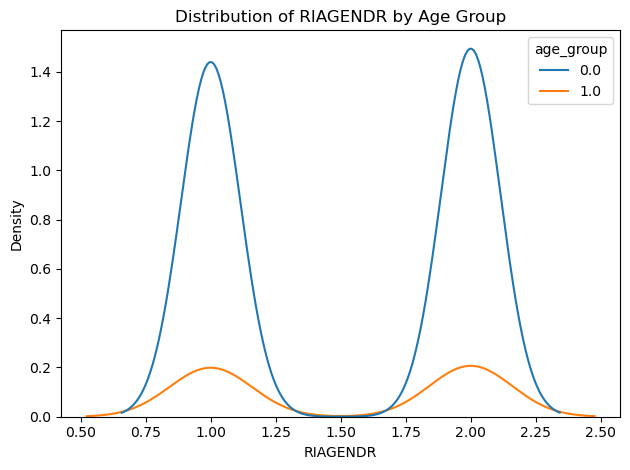

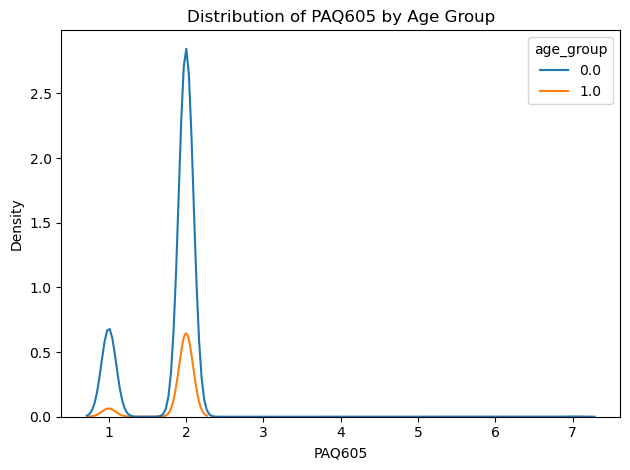

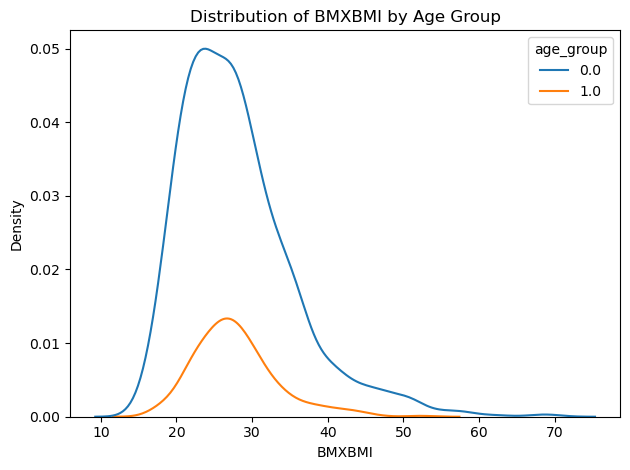

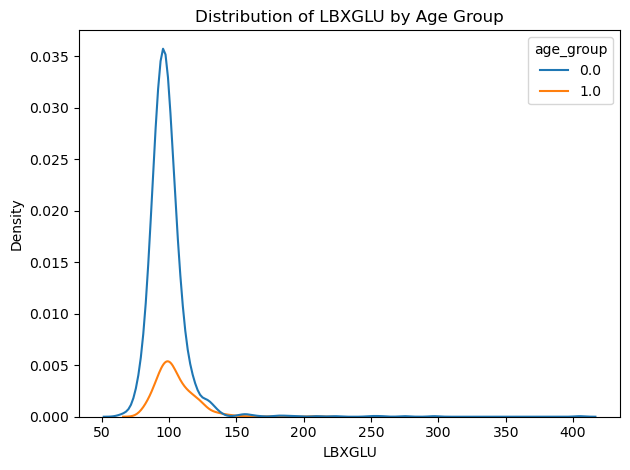

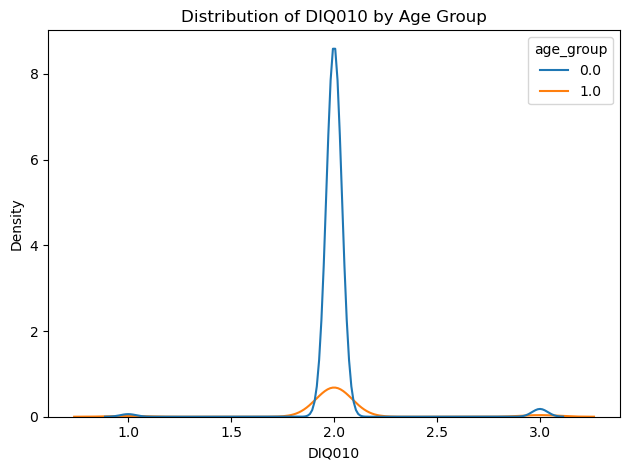

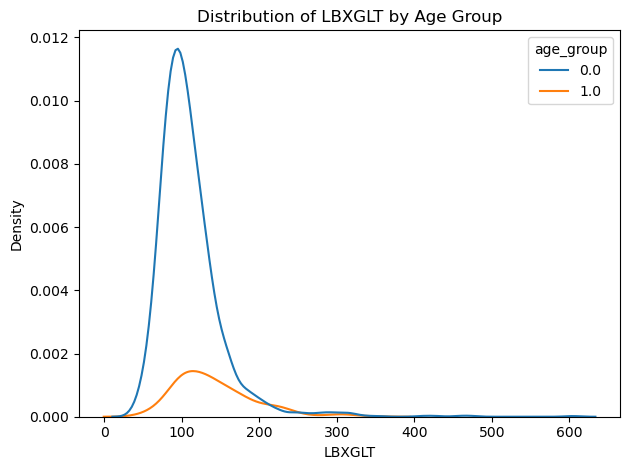

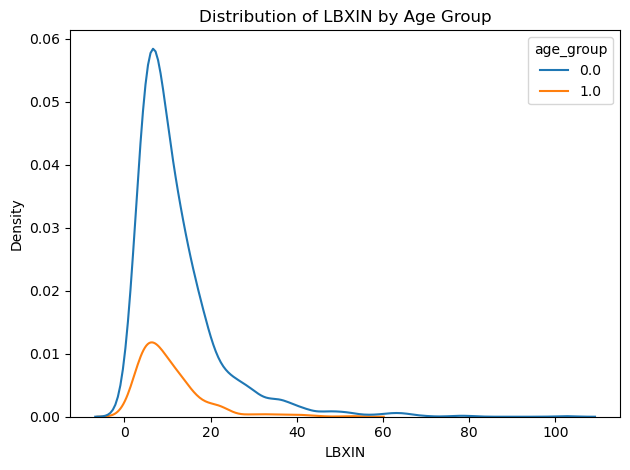

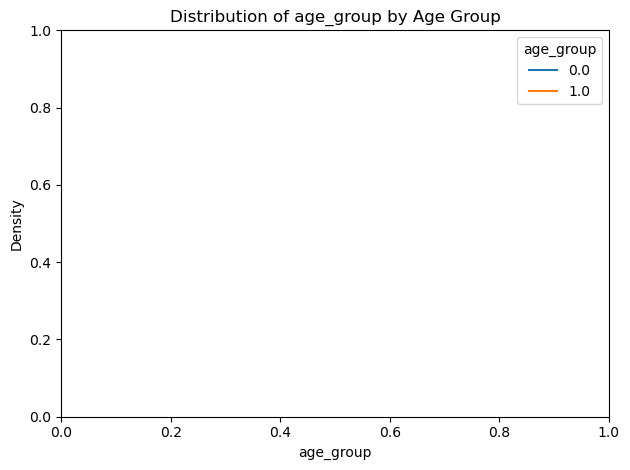

In [15]:
for col in numeric_cols:
    plt.figure()
    sns.kdeplot(data=train_df, x=col, hue='age_group')
    plt.title(f'Distribution of {col} by Age Group')
    plt.tight_layout()
    plt.show()

<Axes: >

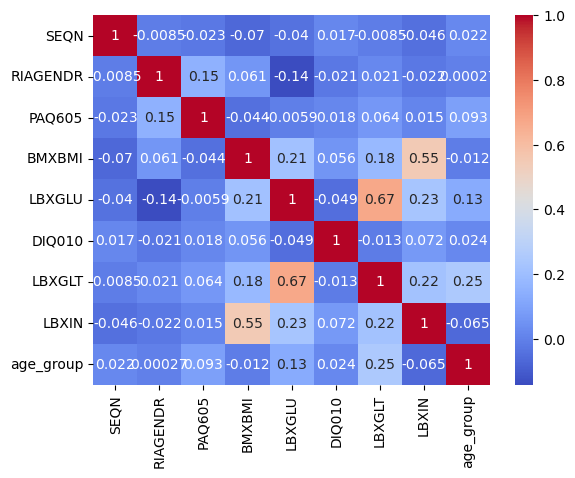

In [16]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

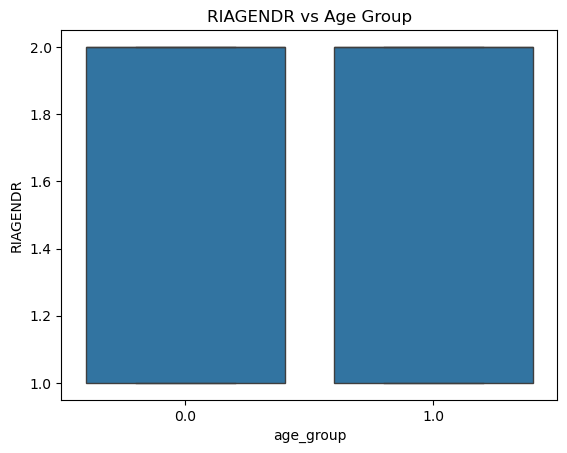

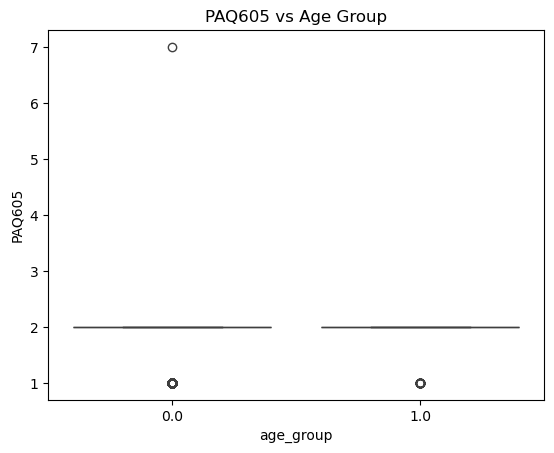

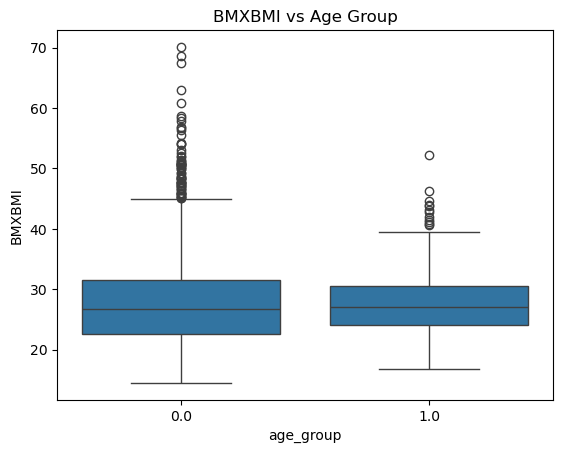

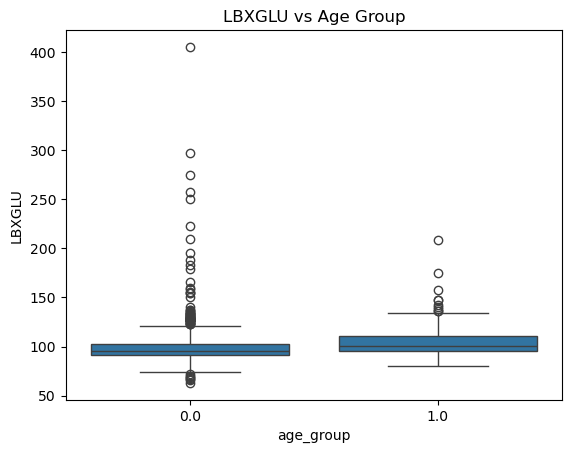

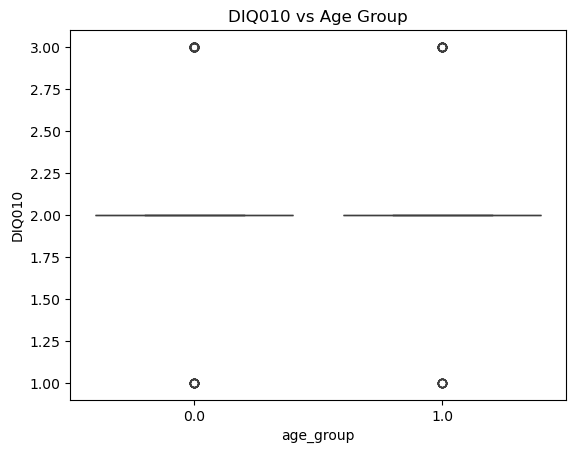

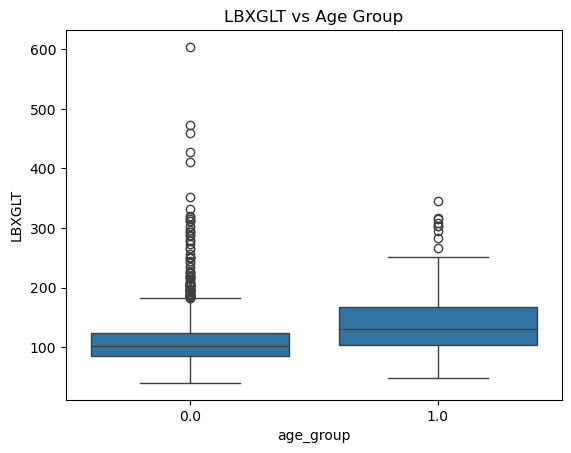

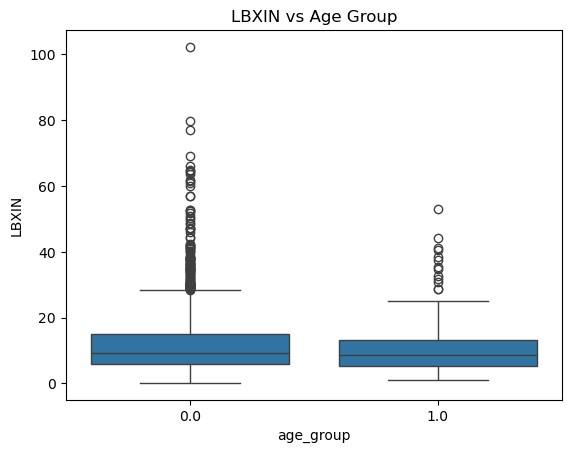

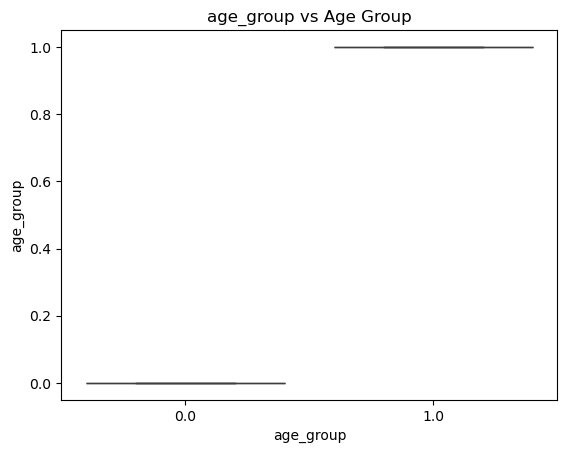

In [17]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='age_group', y=col, data=train_df)
    plt.title(f'{col} vs Age Group')
    plt.show()

In [18]:
train_df[train_df['PAQ605'] == 7].shape[0]

1

In [19]:
train_df = train_df[train_df['PAQ605'] != 7]

In [20]:
from sklearn.linear_model import LinearRegression

#imputing missing values of LBXIN using BMXBMI
complete = train_df.dropna(subset=['LBXIN', 'BMXBMI'])
missing = train_df[train_df['LBXIN'].isna() & train_df['BMXBMI'].notna()]

model_in = LinearRegression()
model_in.fit(complete[['BMXBMI']], complete['LBXIN'])

train_df.loc[missing.index, 'LBXIN'] = model_in.predict(missing[['BMXBMI']])

In [21]:
#imputing missing values of LBXGLT using LBXGLU
complete = train_df.dropna(subset=['LBXGLT', 'LBXGLU'])
missing = train_df[train_df['LBXGLT'].isna() & train_df['LBXGLU'].notna()]

model_glt = LinearRegression()
model_glt.fit(complete[['LBXGLU']], complete['LBXGLT'])

train_df.loc[missing.index, 'LBXGLT'] = model_glt.predict(missing[['LBXGLU']])

In [22]:
#imputing missing values of DIQ010 using LBXGLT
complete = train_df.dropna(subset=['DIQ010', 'LBXGLT'])
missing = train_df[train_df['DIQ010'].isna() & train_df['LBXGLT'].notna()]

model_diq = LinearRegression()
model_diq.fit(complete[['LBXGLT']], complete['DIQ010'])

preds = model_diq.predict(missing[['LBXGLT']])
train_df.loc[missing.index, 'DIQ010'] = preds.round().clip(1, 3) 

In [23]:
train_df.isna().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010        0
LBXGLT        0
LBXIN         0
age_group    14
dtype: int64

In [24]:
#imputing missing values of BMSXBMI using LBXIN
bmi_complete = train_df.dropna(subset=['BMXBMI', 'LBXIN'])
bmi_missing = train_df[train_df['BMXBMI'].isna() & train_df['LBXIN'].notna()]

bmi_model = LinearRegression()
bmi_model.fit(bmi_complete[['LBXIN']], bmi_complete['BMXBMI'])

train_df.loc[bmi_missing.index, 'BMXBMI'] = bmi_model.predict(bmi_missing[['LBXIN']])

In [25]:
#imputing missing values of LBXGLU using LBXGLT
glu_complete = train_df.dropna(subset=['LBXGLU', 'LBXGLT'])
glu_missing = train_df[train_df['LBXGLU'].isna() & train_df['LBXGLT'].notna()]

glu_model = LinearRegression()
glu_model.fit(glu_complete[['LBXGLT']], glu_complete['LBXGLU'])

train_df.loc[glu_missing.index, 'LBXGLU'] = glu_model.predict(glu_missing[['LBXGLT']])

In [26]:
#imputing missing RIAGENDR values
train_df['RIAGENDR'] = train_df['RIAGENDR'].fillna(train_df['RIAGENDR'].mode()[0])

In [27]:
from sklearn.ensemble import RandomForestClassifier
#imputing missing PA605 values using other features
paq_complete = train_df.dropna(subset=['PAQ605'])
paq_missing = train_df[train_df['PAQ605'].isna()]

features = ['RIAGENDR', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

model_paq = RandomForestClassifier(random_state=42)
model_paq.fit(paq_complete[features], paq_complete['PAQ605'])

train_df.loc[paq_missing.index, 'PAQ605'] = model_paq.predict(paq_missing[features])

In [28]:
age_complete = train_df.dropna(subset=['age_group'])
age_missing = train_df[train_df['age_group'].isna()]

#imputing missing age_group using other features 
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

model_age = RandomForestClassifier(random_state=42)
model_age.fit(age_complete[features], age_complete['age_group'])

train_df.loc[age_missing.index, 'age_group'] = model_age.predict(age_missing[features])

In [29]:
train_df['GLU/IN'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1e-3)
train_df['BMIxGLU'] = train_df['BMXBMI'] * train_df['LBXGLU']
train_df['GLT/GLU'] = train_df['LBXGLT'] / (train_df['LBXGLU'] + 1e-3)
train_df['IN*BMI'] = train_df['LBXIN'] * train_df['BMXBMI']
train_df['ACTIVITY*GLU'] = train_df['PAQ605'] * train_df['LBXGLU']

In [30]:
train_df.isna().sum()

SEQN            12
RIAGENDR         0
PAQ605           0
BMXBMI           0
LBXGLU           0
DIQ010           0
LBXGLT           0
LBXIN            0
age_group        0
GLU/IN           0
BMIxGLU          0
GLT/GLU          0
IN*BMI           0
ACTIVITY*GLU     0
dtype: int64

In [31]:
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN','GLU/IN','BMIxGLU','ACTIVITY*GLU']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = train_df[features]
y = train_df['age_group']

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [36]:
# from sklearn.model_selection import RandomizedSearchCV

# random_grid = {
#     'max_depth': [4, 6, 8, 10, 12, None],
#     'n_estimators': [50, 100, 150, 200, 250, 300, 350],
#     'min_samples_leaf': [1, 3, 5, 7, 10]
# }

# random_search = RandomizedSearchCV(
#     model, random_grid, n_iter=30, cv=5, scoring='f1', random_state=42, n_jobs=-1
# )
# random_search.fit(X_resampled, y_resampled)

In [37]:
# print("Best Parameters:", random_search.best_params_)

In [38]:
model = RandomForestClassifier(max_depth = 12, min_samples_leaf = 5, n_estimators = 150, class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, n_estimators=150, random_state=42)

In [40]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8015267175572519

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       337
         1.0       0.34      0.43      0.38        56

    accuracy                           0.80       393
   macro avg       0.62      0.65      0.63       393
weighted avg       0.82      0.80      0.81       393



In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.7954198473282442


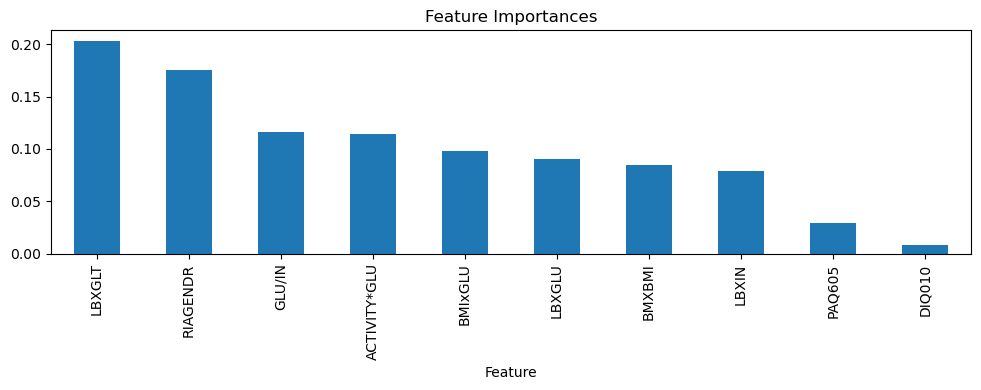

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', figsize=(10,4), legend=False)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [43]:
test_df = pd.read_csv('Test_Data.csv')

In [44]:
test_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [45]:
test_df.shape

(312, 8)

In [46]:
test_df.isna().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [47]:
complete = test_df.dropna(subset=['LBXIN', 'BMXBMI'])
missing = test_df[test_df['LBXIN'].isna() & test_df['BMXBMI'].notna()]

model_in = LinearRegression()
model_in.fit(complete[['BMXBMI']], complete['LBXIN'])

test_df.loc[missing.index, 'LBXIN'] = model_in.predict(missing[['BMXBMI']])

In [48]:
complete = test_df.dropna(subset=['LBXGLT', 'LBXGLU'])
missing = test_df[test_df['LBXGLT'].isna() & test_df['LBXGLU'].notna()]

model_glt = LinearRegression()
model_glt.fit(complete[['LBXGLU']], complete['LBXGLT'])

test_df.loc[missing.index, 'LBXGLT'] = model_glt.predict(missing[['LBXGLU']])

In [49]:
complete = test_df.dropna(subset=['DIQ010', 'LBXGLT'])
missing = test_df[test_df['DIQ010'].isna() & test_df['LBXGLT'].notna()]

model_diq = LinearRegression()
model_diq.fit(complete[['LBXGLT']], complete['DIQ010'])

preds = model_diq.predict(missing[['LBXGLT']])
test_df.loc[missing.index, 'DIQ010'] = preds.round().clip(1, 3)  

In [50]:
bmi_complete = test_df.dropna(subset=['BMXBMI', 'LBXIN'])
bmi_missing = test_df[test_df['BMXBMI'].isna() & test_df['LBXIN'].notna()]

bmi_model = LinearRegression()
bmi_model.fit(bmi_complete[['LBXIN']], bmi_complete['BMXBMI'])

test_df.loc[bmi_missing.index, 'BMXBMI'] = bmi_model.predict(bmi_missing[['LBXIN']])

In [51]:
glu_complete = test_df.dropna(subset=['LBXGLU', 'LBXGLT'])
glu_missing = test_df[test_df['LBXGLU'].isna() & test_df['LBXGLT'].notna()]

glu_model = LinearRegression()
glu_model.fit(glu_complete[['LBXGLT']], glu_complete['LBXGLU'])

test_df.loc[glu_missing.index, 'LBXGLU'] = glu_model.predict(glu_missing[['LBXGLT']])

In [52]:
test_df['RIAGENDR'] = test_df['RIAGENDR'].fillna(test_df['RIAGENDR'].mode()[0])

In [53]:
paq_complete = test_df.dropna(subset=['PAQ605'])
paq_missing = test_df[test_df['PAQ605'].isna()]

feature_paq = ['RIAGENDR', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

model_paq = RandomForestClassifier(random_state=42)
model_paq.fit(paq_complete[feature_paq], paq_complete['PAQ605'])

test_df.loc[paq_missing.index, 'PAQ605'] = model_paq.predict(paq_missing[feature_paq])

In [54]:
test_df['GLU/IN'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1e-3)
test_df['BMIxGLU'] = test_df['BMXBMI'] * test_df['LBXGLU']
test_df['GLT/GLU'] = test_df['LBXGLT'] / (test_df['LBXGLU'] + 1e-3)
test_df['IN*BMI'] = test_df['LBXIN'] * test_df['BMXBMI']
test_df['ACTIVITY*GLU'] = test_df['PAQ605'] * test_df['LBXGLU']

In [55]:
test_df.isna().sum()

SEQN            2
RIAGENDR        0
PAQ605          0
BMXBMI          0
LBXGLU          0
DIQ010          0
LBXGLT          0
LBXIN           0
GLU/IN          0
BMIxGLU         0
GLT/GLU         0
IN*BMI          0
ACTIVITY*GLU    0
dtype: int64

In [56]:
X_test_final = test_df[features]  

In [57]:
X_test_final.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,GLU/IN,BMIxGLU,ACTIVITY*GLU
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11,6.352988,3091.2,96.0
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26,6.552651,2630.0,200.0
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82,12.130144,3060.2,214.0
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13,7.666309,2055.3,93.0
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12,29.157321,2247.7,91.0


In [58]:
for col in X.columns:
    X_test_final[col] = X_test_final[col].astype(X[col].dtype)

In [59]:
print("Model expects:", model.feature_names_in_)
print("Test features:", X_test_final.columns.to_list())

Model expects: ['RIAGENDR' 'PAQ605' 'BMXBMI' 'LBXGLU' 'DIQ010' 'LBXGLT' 'LBXIN' 'GLU/IN'
 'BMIxGLU' 'ACTIVITY*GLU']
Test features: ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'GLU/IN', 'BMIxGLU', 'ACTIVITY*GLU']


In [60]:
print(X.dtypes)
print(test_df[features].dtypes)

RIAGENDR        float64
PAQ605          float64
BMXBMI          float64
LBXGLU          float64
DIQ010          float64
LBXGLT          float64
LBXIN           float64
GLU/IN          float64
BMIxGLU         float64
ACTIVITY*GLU    float64
dtype: object
RIAGENDR        float64
PAQ605          float64
BMXBMI          float64
LBXGLU          float64
DIQ010          float64
LBXGLT          float64
LBXIN           float64
GLU/IN          float64
BMIxGLU         float64
ACTIVITY*GLU    float64
dtype: object


In [62]:
# y_test_pred = model.predict(X_test_final)

probs = model.predict_proba(X_test_final)[:, 1]  # Probabilities for class 1

y_test_pred = (probs > 0.4).astype(int)

In [63]:
submission = pd.DataFrame({'age_group': y_test_pred})
submission.to_csv('submission_week4.csv', index=False)

In [64]:
submission

,age_group
0,0
1,1
2,1
3,0
4,0
...,...
307,0
308,0
309,0
310,0


In [65]:
print(train_df['age_group'].value_counts(normalize=True))

age_group
0.0    0.840204
1.0    0.159796
Name: proportion, dtype: float64


In [66]:
print(submission['age_group'].value_counts(normalize=True))

age_group
0    0.769231
1    0.230769
Name: proportion, dtype: float64
